In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install -U scikit-learn scipy matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install opencv-python
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



  Using cached tensorflow-2.9.1-cp39-cp39-win_amd64.whl (444.0 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.9.0-py2.py3-none-any.whl (1.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.9.0-py2.py3-none-any.whl (438 kB)
  Using cached tensorflow_io_gcs_filesystem-0.26.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.9.1-py3-none-any.whl (5.8 MB)
  Using cached libclang-14.0.1-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached absl_py-1.1.0-py3-none-any.whl (123 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.w

In [6]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
print("Device: \n", tf.config.experimental.list_physical_devices())
print(tf.__version__)
print(tf.test.is_built_with_cuda())

Device: 
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2.9.1
True


In [12]:
def clahe_function(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_img)
    clahe_img = clahe.apply(l)
    updated_lab_img2 = cv2.merge((clahe_img, a, b))
    # Convert LAB image back to color (RGB)
    CLAHE_img = cv2.cvtColor(updated_lab_img2, cv2.COLOR_LAB2BGR)
    return CLAHE_img

In [13]:
images = []
def load_images_from_folder(folder):
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        #img = cv2.resize(img, (224, 224))
        img = clahe_function(img)
        img = img/255.0
        img = cv2.resize(img, (224, 224))
        if img is not None:
            images.append(img)
    return images

In [14]:
COVID = r"E:/sabbir/COVID"
non_COVID = r"E:/sabbir/non_COVID"  

In [15]:
load_images_from_folder(COVID)
load_images_from_folder(non_COVID)

[array([[[0.58151261, 0.58151261, 0.58151261],
         [0.65798319, 0.65798319, 0.65798319],
         [0.68543417, 0.68543417, 0.68543417],
         ...,
         [0.70392157, 0.70392157, 0.70392157],
         [0.64593838, 0.64593838, 0.64593838],
         [0.64201681, 0.64201681, 0.64201681]],
 
        [[0.58079607, 0.58079607, 0.58079607],
         [0.63577056, 0.63577056, 0.63577056],
         [0.61616897, 0.61616897, 0.61616897],
         ...,
         [0.70965386, 0.70965386, 0.70965386],
         [0.70803822, 0.70803822, 0.70803822],
         [0.61932648, 0.61932648, 0.61932648]],
 
        [[0.61976916, 0.61976916, 0.61976916],
         [0.67610169, 0.67610169, 0.67610169],
         [0.61878376, 0.61878376, 0.61878376],
         ...,
         [0.69014481, 0.69014481, 0.69014481],
         [0.67565526, 0.67565526, 0.67565526],
         [0.61773084, 0.61773084, 0.61773084]],
 
        ...,
 
        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.     

In [16]:
y = np.ones(1229)  #labeling non-covid images as 1
y = np.append(y, np.zeros(1252))   #labeling covid images as 0
y = list(y)
c = list(zip(images, y))

In [17]:
random.shuffle(c)
images, y = zip(*c)
del c  #For Memory Efficiency
images = np.array(images)
y = np.array(y)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.15, stratify= y, random_state =2)


In [19]:
model = tf.keras.Sequential()

In [20]:
model.add(tf.keras.layers.Conv2D(8, 3, input_shape=(224, 224, 3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2))

In [21]:
model.add(tf.keras.layers.Conv2D(16, 3, padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2))

In [22]:
model.add(tf.keras.layers.Conv2D(32, 3, padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2))

In [23]:
model.add(tf.keras.layers.Conv2D(64, 3, padding="valid"))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(2))

In [24]:
model.add(tf.keras.layers.Flatten())

In [25]:
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [26]:
model.add(tf.keras.layers.Dense(100,name ='feature_denseee')) #100 Prominant Features are Extracted From This Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.Dropout(0.5))

In [27]:
model.add(tf.keras.layers.Dense(2))
model.add(tf.keras.layers.Activation('softmax'))
adam = tf.keras.optimizers.Adam(lr=0.001)


C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['acc'], optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 16)     6

In [29]:
with tf.device('/GPU:0'):
    
    history = model.fit(X_train, y_train, batch_size= 32, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
66/66 [==============================] - 59s 726ms/step - loss: 0.5469 - acc: 0.7528 - val_loss: 0.7418 - val_acc: 0.4665
Epoch 2/100
66/66 [==============================] - 61s 924ms/step - loss: 0.3012 - acc: 0.8795 - val_loss: 0.9149 - val_acc: 0.4960
Epoch 3/100
66/66 [==============================] - 63s 955ms/step - loss: 0.2247 - acc: 0.9113 - val_loss: 0.8712 - val_acc: 0.3914
Epoch 4/100
66/66 [==============================] - 64s 966ms/step - loss: 0.1644 - acc: 0.9473 - val_loss: 0.7278 - val_acc: 0.7292
Epoch 5/100
66/66 [==============================] - 46s 697ms/step - loss: 0.1306 - acc: 0.9521 - val_loss: 0.9290 - val_acc: 0.5630
Epoch 6/100
66/66 [==============================] - 51s 775ms/step - loss: 0.1050 - acc: 0.9616 - val_loss: 0.1940 - val_acc: 0.9249
Epoch 7/100
66/66 [==============================] - 65s 995ms/step - loss: 0.0840 - acc: 0.9725 - val_loss: 0.1531 - val_acc: 0.9517
Epoch 8/100
66/66 [==============================] - 59s 896ms

In [34]:
model.save(r'E:/model/save.h5')

In [35]:
model = tf.keras.models.load_model(r'E:/model/save.h5')
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('feature_denseee').output)
intermediate_layer_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      1168

In [33]:
feature_engg_data = intermediate_layer_model.predict(images)
feature_engg_data = pd.DataFrame(feature_engg_data)

78/78 [==============================] - 27s 246ms/step


In [36]:
feature_engg_data.to_pickle(r'E:/model/finalfeaturescovid.pkl')
features = pd.read_pickle(r'E:/model/finalfeaturescovid.pkl')

In [37]:
from sklearn.preprocessing import StandardScaler
x = feature_engg_data.loc[:, feature_engg_data.columns].values
x = StandardScaler().fit_transform(x)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify= y, random_state =0)


C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


(array([0.        , 0.00531915, 1.        ]), array([0.        , 0.99459459, 1.        ]), array([2., 1., 0.]))
[[187   1]
 [  1 184]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       188
         1.0       0.99      0.99      0.99       185

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



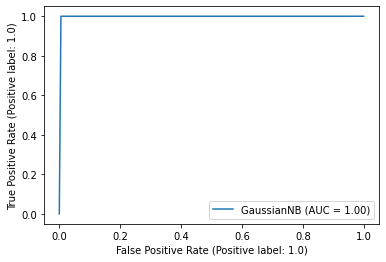

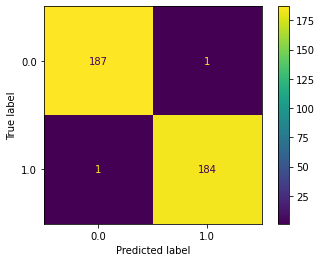

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn import  metrics
model = GaussianNB()
model.fit(X_train, y_train)
y_pred1 = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred1)
metrics.plot_roc_curve(model, X_test, y_test)
metrics.plot_confusion_matrix(model, X_test, y_test)
print(metrics.roc_curve(y_test, y_pred1))
print(metrics.confusion_matrix(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred1))

[[187   1]
 [  1 184]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       188
         1.0       0.99      0.99      0.99       185

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


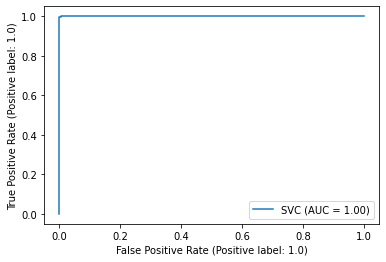

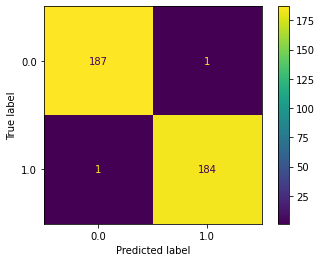

In [56]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid', probability=True)
svclassifier.fit(X_train, y_train)
y_pred2 = svclassifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred2)
metrics.plot_roc_curve(svclassifier, X_test, y_test)
metrics.plot_confusion_matrix(svclassifier, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_pred2))
print(metrics.classification_report(y_test, y_pred2))

0.9973190348525469
[[187   1]
 [  0 185]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       188
         1.0       0.99      1.00      1.00       185

    accuracy                           1.00       373
   macro avg       1.00      1.00      1.00       373
weighted avg       1.00      1.00      1.00       373



C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


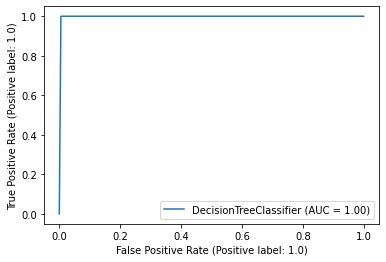

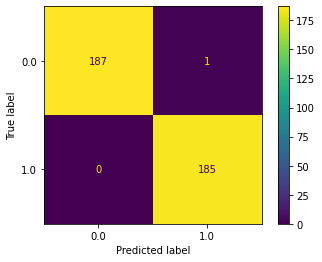

In [57]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred3 = dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred3))
metrics.roc_curve(y_test, y_pred3)
metrics.plot_roc_curve(dt, X_test, y_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_pred3))
print(metrics.classification_report(y_test, y_pred3))

0.9946380697050938
[[187   1]
 [  1 184]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       188
         1.0       0.99      0.99      0.99       185

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


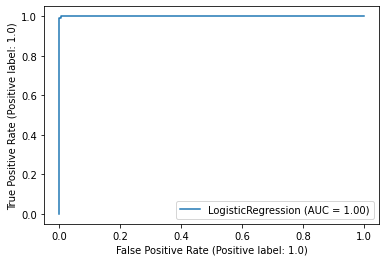

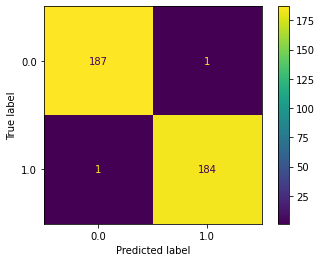

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=1)
lr = lr.fit(X_train, y_train)
y_pred4 = lr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred4))
metrics.plot_roc_curve(lr, X_test, y_test)
metrics.plot_confusion_matrix(lr, X_test, y_test)
print(metrics.confusion_matrix(y_test, y_pred4))
print(metrics.classification_report(y_test, y_pred4))

0.9946380697050938
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       188
         1.0       0.99      0.99      0.99       185

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


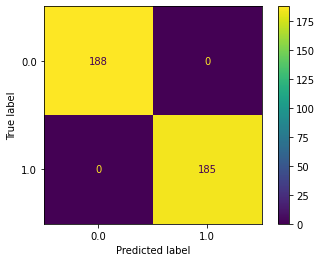

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=50, random_state=1)
RF = RF.fit(X_train, y_train)
y_pred5 = RF.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred5))
metrics.plot_confusion_matrix(RF, X_test, y_pred5)
print(metrics.classification_report(y_test, y_pred5))

C:\Users\sabbi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       188
         1.0       0.99      0.99      0.99       185

    accuracy                           0.99       373
   macro avg       0.99      0.99      0.99       373
weighted avg       0.99      0.99      0.99       373



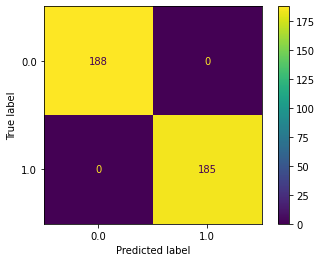

In [60]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[('GNB', model), ('svm', svclassifier), ('dt', dt), ('lr', lr), ('rf', RF)], voting='hard')
voting_classifier.fit(X_train, y_train)
y_pred_vot = voting_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred_vot)
metrics.plot_confusion_matrix(voting_classifier, X_test, y_pred_vot)
print(metrics.classification_report(y_test, y_pred_vot))

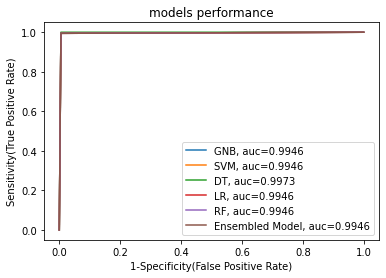

In [79]:
plt.figure(0).clf()
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred1)
auc = metrics.roc_auc_score(y_test, y_pred1)
plt.plot(fpr,tpr,label="GNB, auc="+str('{0:.4f}'.format(auc)))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred2)
auc = metrics.roc_auc_score(y_test, y_pred2)
plt.plot(fpr,tpr,label="SVM, auc="+str('{0:.4f}'.format(auc)))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred3)
auc = metrics.roc_auc_score(y_test, y_pred3)
plt.plot(fpr,tpr,label="DT, auc="+str('{0:.4f}'.format(auc)))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred4)
auc = metrics.roc_auc_score(y_test, y_pred4)
plt.plot(fpr,tpr,label="LR, auc="+str('{0:.4f}'.format(auc)))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred5)
auc = metrics.roc_auc_score(y_test, y_pred5)
plt.plot(fpr,tpr,label="RF, auc="+str('{0:.4f}'.format(auc)))
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_vot)
auc = metrics.roc_auc_score(y_test, y_pred_vot)
plt.plot(fpr,tpr,label="Ensembled Model, auc="+str('{0:.4f}'.format(auc)))
plt.title("models performance")
plt.xlabel("1-Specificity(False Positive Rate)")
plt.ylabel("Sensitivity(True Positive Rate)")
plt.legend(loc=0)